# Load the dataset

In [76]:
import pandas as pd

# Load the dataset
file_path = 'HR-Employee.csv'
data_cleaned = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
data_cleaned.head(), data_cleaned.columns

(   Age Attrition     BusinessTravel  DailyRate              Department  \
 0   41       Yes      Travel_Rarely       1102                   Sales   
 1   49        No  Travel_Frequently        279  Research & Development   
 2   37       Yes      Travel_Rarely       1373  Research & Development   
 3   33        No  Travel_Frequently       1392  Research & Development   
 4   27        No      Travel_Rarely        591  Research & Development   
 
    DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
 0                 1          2  Life Sciences              1               1   
 1                 8          1  Life Sciences              1               2   
 2                 2          2          Other              1               4   
 3                 3          4  Life Sciences              1               5   
 4                 2          1        Medical              1               7   
 
    ...  RelationshipSatisfaction StandardHours  StockOption

# Summary with describe()

In [25]:
data_cleaned.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Employee Information

In [99]:
basic_info = data_cleaned[['EmployeeNumber', 'Age', 'Gender', 'Department', 'JobRole']]
print(basic_info)

      EmployeeNumber  Age  Gender              Department  \
0                  1   41  Female                   Sales   
1                  2   49    Male  Research & Development   
2                  4   37    Male  Research & Development   
3                  5   33  Female  Research & Development   
4                  7   27    Male  Research & Development   
...              ...  ...     ...                     ...   
1465            2061   36    Male  Research & Development   
1466            2062   39    Male  Research & Development   
1467            2064   27    Male  Research & Development   
1468            2065   49    Male                   Sales   
1469            2068   34    Male  Research & Development   

                        JobRole  
0               Sales Executive  
1            Research Scientist  
2         Laboratory Technician  
3            Research Scientist  
4         Laboratory Technician  
...                         ...  
1465      Laboratory Technici

# Attrition Information

In [101]:
attrition_info = data_cleaned[['EmployeeNumber', 'Attrition', 'YearsAtCompany', 'YearsSinceLastPromotion']]
print(attrition_info)

      EmployeeNumber Attrition  YearsAtCompany  YearsSinceLastPromotion
0                  1       Yes               6                        0
1                  2        No              10                        1
2                  4       Yes               0                        0
3                  5        No               8                        3
4                  7        No               2                        2
...              ...       ...             ...                      ...
1465            2061        No               5                        0
1466            2062        No               7                        1
1467            2064        No               6                        0
1468            2065        No               9                        0
1469            2068        No               4                        1

[1470 rows x 4 columns]


# Department-wise Employee Distribution

In [102]:
department_distribution = data_cleaned[['EmployeeNumber', 'Department']].groupby('Department').count().reset_index().rename(columns={'EmployeeNumber': 'EmployeeCount'})
print(department_distribution)

               Department  EmployeeCount
0         Human Resources             63
1  Research & Development            961
2                   Sales            446


In [103]:
gender_job_role = data_cleaned[['Gender', 'JobRole']].groupby(['Gender', 'JobRole']).size().reset_index(name='Count')
print(gender_job_role)

    Gender                    JobRole  Count
0   Female  Healthcare Representative     51
1   Female            Human Resources     16
2   Female      Laboratory Technician     85
3   Female                    Manager     47
4   Female     Manufacturing Director     72
5   Female          Research Director     33
6   Female         Research Scientist    114
7   Female            Sales Executive    132
8   Female       Sales Representative     38
9     Male  Healthcare Representative     80
10    Male            Human Resources     36
11    Male      Laboratory Technician    174
12    Male                    Manager     55
13    Male     Manufacturing Director     73
14    Male          Research Director     47
15    Male         Research Scientist    178
16    Male            Sales Executive    194
17    Male       Sales Representative     45


# Counts with 'counts()'

In [26]:
data_cleaned.count()

Age                         1470
Attrition                   1470
BusinessTravel              1470
DailyRate                   1470
Department                  1470
DistanceFromHome            1470
Education                   1470
EducationField              1470
EmployeeCount               1470
EmployeeNumber              1470
EnvironmentSatisfaction     1470
Gender                      1470
HourlyRate                  1470
JobInvolvement              1470
JobLevel                    1470
JobRole                     1470
JobSatisfaction             1470
MaritalStatus               1470
MonthlyIncome               1470
MonthlyRate                 1470
NumCompaniesWorked          1470
Over18                      1470
OverTime                    1470
PercentSalaryHike           1470
PerformanceRating           1470
RelationshipSatisfaction    1470
StandardHours               1470
StockOptionLevel            1470
TotalWorkingYears           1470
TrainingTimesLastYear       1470
WorkLifeBa

# Calculate the mean of each numeric column.

In [ ]:
data.mean()

 # Calculate the correlation matrix for numeric columns.

In [27]:
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64'])
numeric_columns.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


# Drop redundant columns

In [28]:
# Drop redundant columns
data_cleaned = data_cleaned.drop(columns=['EmployeeCount', 'Over18', 'StandardHours'])

# Rename columns

In [29]:
data_cleaned = data_cleaned.rename(columns={
    'EmployeeNumber': 'Employee_ID',
    'Attrition': 'Employee_Attrition',
    'BusinessTravel': 'Business_Travel',
    'DailyRate': 'Daily_Rate',
    'DistanceFromHome': 'Distance_From_Home',
    'EducationField': 'Education_Field',
    'JobRole': 'Job_Role',
    'MaritalStatus': 'Marital_Status',
    'MonthlyIncome': 'Monthly_Income',
    'MonthlyRate': 'Monthly_Rate',
    'NumCompaniesWorked': 'Number_of_Companies_Worked',
    'OverTime': 'Over_Time',
    'PercentSalaryHike': 'Percent_Salary_Hike',
    'PerformanceRating': 'Performance_Rating',
    'RelationshipSatisfaction': 'Relationship_Satisfaction',
    'StockOptionLevel': 'Stock_Option_Level',
    'TotalWorkingYears': 'Total_Working_Years',
    'TrainingTimesLastYear': 'Training_Times_Last_Year',
    'WorkLifeBalance': 'Work_Life_Balance',
    'YearsAtCompany': 'Years_At_Company',
    'YearsInCurrentRole': 'Years_In_Current_Role',
    'YearsSinceLastPromotion': 'Years_Since_Last_Promotion',
    'YearsWithCurrManager': 'Years_With_Current_Manager'
})


# Review Columns

In [31]:
data_cleaned.columns

Index(['Age', 'Employee_Attrition', 'Business_Travel', 'Daily_Rate',
       'Department', 'Distance_From_Home', 'Education', 'Education_Field',
       'Employee_ID', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'Job_Role', 'JobSatisfaction',
       'Marital_Status', 'Monthly_Income', 'Monthly_Rate',
       'Number_of_Companies_Worked', 'Over_Time', 'Percent_Salary_Hike',
       'Performance_Rating', 'Relationship_Satisfaction', 'Stock_Option_Level',
       'Total_Working_Years', 'Training_Times_Last_Year', 'Work_Life_Balance',
       'Years_At_Company', 'Years_In_Current_Role',
       'Years_Since_Last_Promotion', 'Years_With_Current_Manager'],
      dtype='object')

# Drop duplicates

In [34]:
data_cleaned = data_cleaned.drop_duplicates()

# Remove NaN values

In [35]:
data_cleaned = data_cleaned.dropna()

# Handling Missing Values

In [40]:
numeric_columns = data_cleaned.select_dtypes(include=['float64', 'int64'])
numeric_columns.fillna(numeric_columns.mean(), inplace=True)

# Display the cleaned data structure

In [36]:
data_cleaned.head(), data_cleaned.columns

(   Age Employee_Attrition    Business_Travel  Daily_Rate  \
 0   41                Yes      Travel_Rarely        1102   
 1   49                 No  Travel_Frequently         279   
 2   37                Yes      Travel_Rarely        1373   
 3   33                 No  Travel_Frequently        1392   
 4   27                 No      Travel_Rarely         591   
 
                Department  Distance_From_Home  Education Education_Field  \
 0                   Sales                   1          2   Life Sciences   
 1  Research & Development                   8          1   Life Sciences   
 2  Research & Development                   2          2           Other   
 3  Research & Development                   3          4   Life Sciences   
 4  Research & Development                   2          1         Medical   
 
    Employee_ID  EnvironmentSatisfaction  ... Performance_Rating  \
 0            1                        2  ...                  3   
 1            2                 

# Data Visualization

## Plot a correlation map for all numeric variables

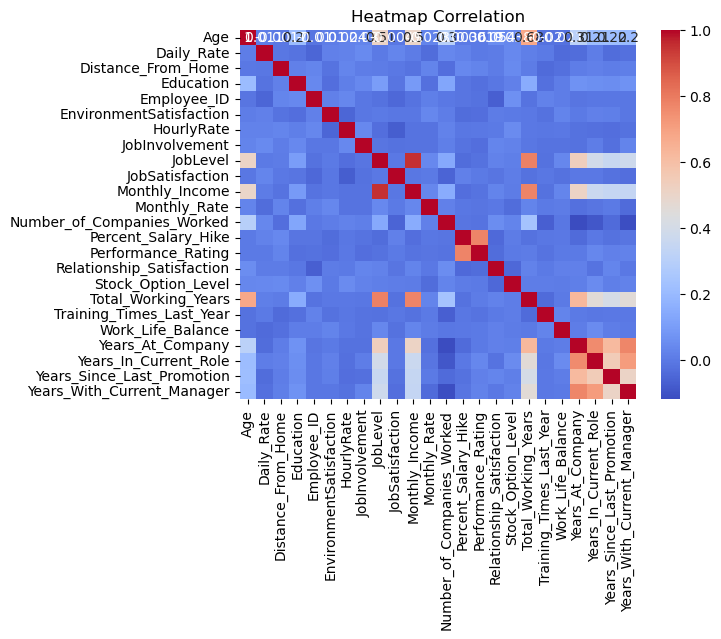

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_variables = data_cleaned.select_dtypes(include=['float64', 'int64'])
corr_heatmap = sns.heatmap(numerical_variables.corr(), cmap='coolwarm', annot=True)
corr_heatmap.set_title('Heatmap Correlation')
#plt.figure(figsize=(20,10))
plt.show()

In [18]:
data_cleaned['OverTime'].head()

0    Yes
1     No
2    Yes
3    Yes
4     No
Name: OverTime, dtype: object

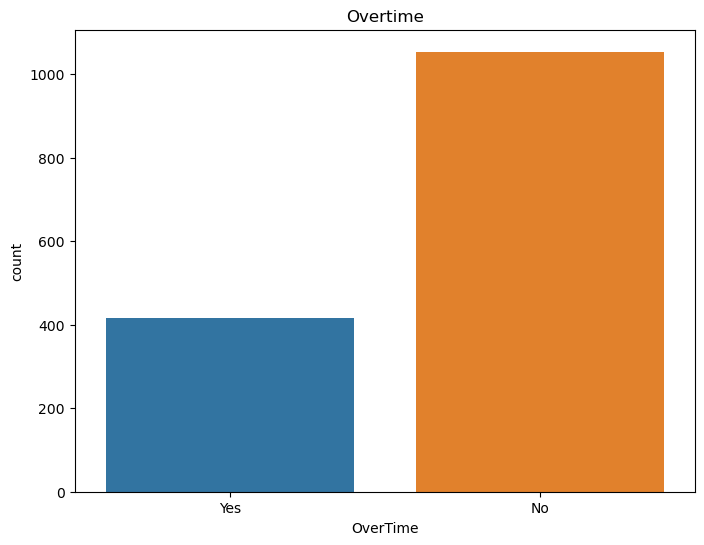

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

file_path = 'HR-Employee.csv'
data_cleaned = pd.read_csv(file_path)

if 'OverTime' in data_cleaned.columns:
    plt.figure(figsize=(8,6))
    sns.countplot(data=data_cleaned, x='OverTime')
    plt.title('Overtime')
    plt.show()
else:
    print('OverTime Column is not exist in DataFrame')

In [24]:
data_cleaned['MaritalStatus'].head()

0     Single
1    Married
2     Single
3    Married
4    Married
Name: MaritalStatus, dtype: object

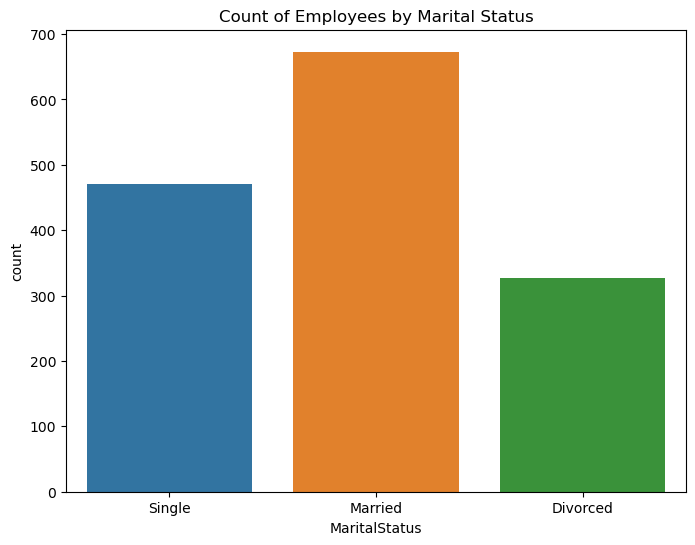

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = 'HR-Employee.csv'
data_cleaned = pd.read_csv(file_path)

# If 'MaritalStatus' exists and is correctly spelled, proceed with the visualization
if 'MaritalStatus' in data_cleaned.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data_cleaned, x='MaritalStatus')
    plt.title('Count of Employees by Marital Status')
    plt.show()
else:
    print("Column 'MaritalStatus' does not exist in the DataFrame.")


In [31]:
data_cleaned['MaritalStatus'].head()

0     Single
1    Married
2     Single
3    Married
4    Married
Name: MaritalStatus, dtype: object

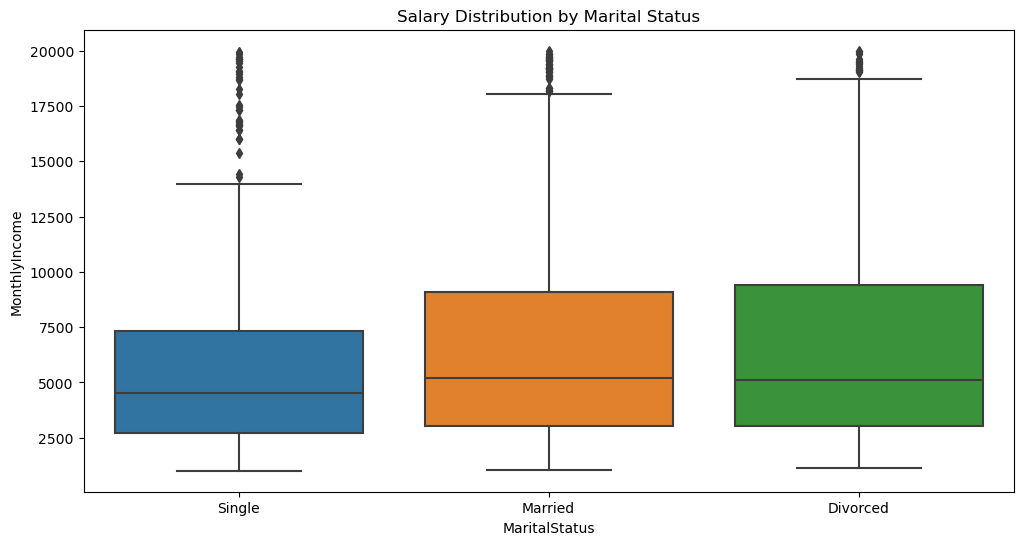

In [50]:
# Assuming 'MonthlyIncome' is the salary column
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_cleaned, x='MaritalStatus', y='MonthlyIncome')
plt.title('Salary Distribution by Marital Status')
plt.show()


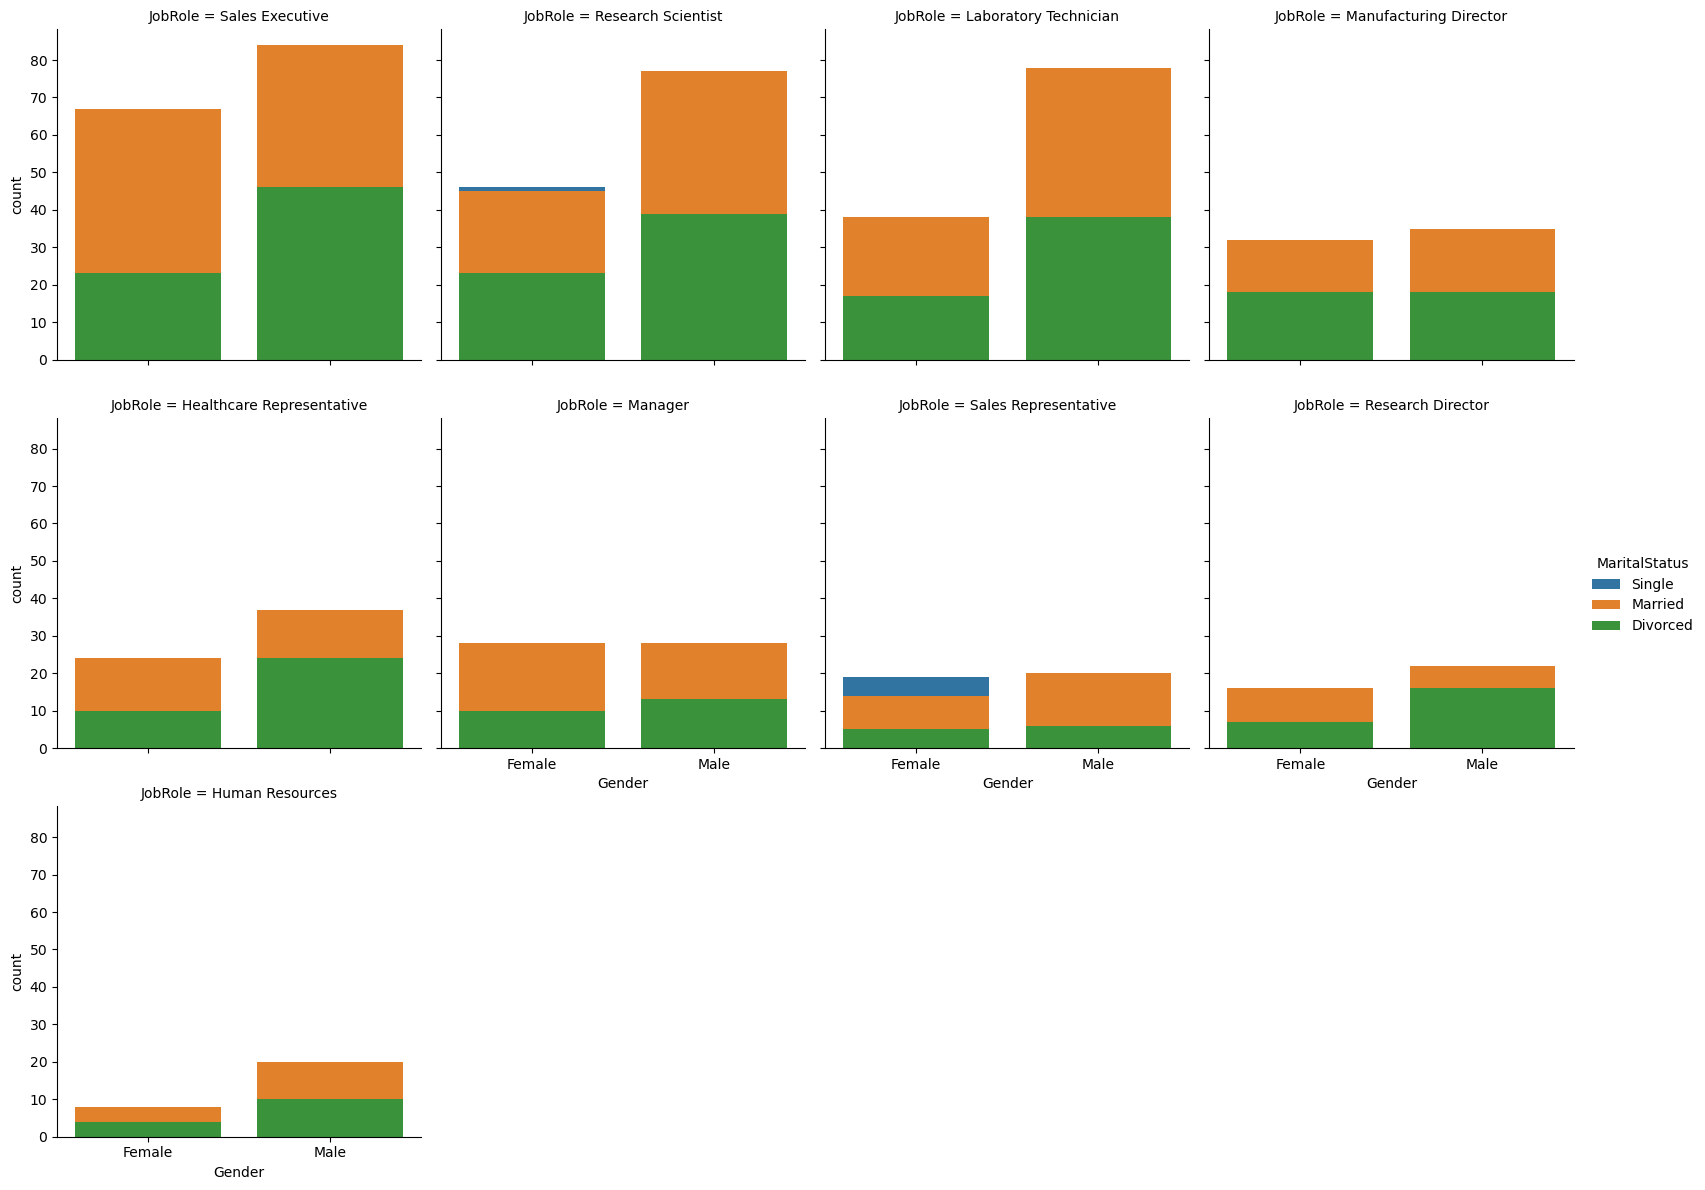

In [57]:
# FacetGrid for Marital Status by Job Role and Gender
marital_status_order = ['Single', 'Married', 'Divorced']  # Adjust based on your data
job_role_order = data_cleaned['JobRole'].value_counts().index
g = sns.FacetGrid(data_cleaned, col='JobRole', hue='MaritalStatus', col_wrap=4, height=4, col_order=job_role_order, hue_order=marital_status_order)
g.map(sns.countplot, 'Gender', order=data_cleaned['Gender'].unique())
g.add_legend()
plt.show()


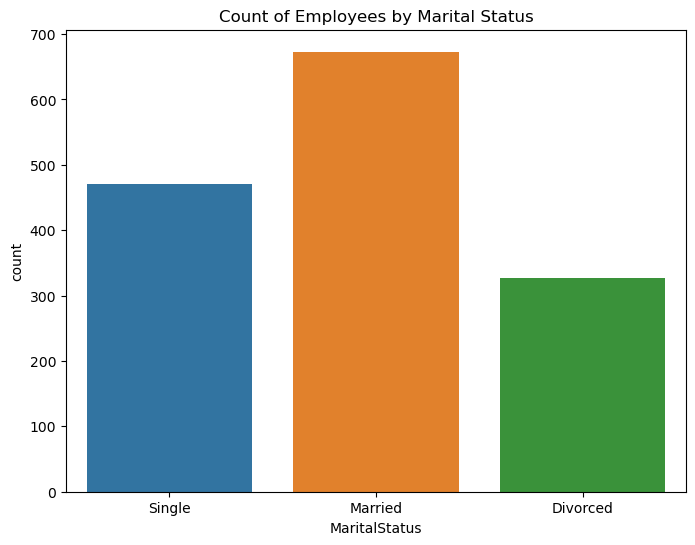

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Order for MaritalStatus categories
marital_status_order = ['Single', 'Married', 'Divorced']  # Adjust based on your data

# Count plot for Marital Status
plt.figure(figsize=(8, 6))
sns.countplot(data=data_cleaned, x='MaritalStatus', order=marital_status_order)
plt.title('Count of Employees by Marital Status')
plt.show()


Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


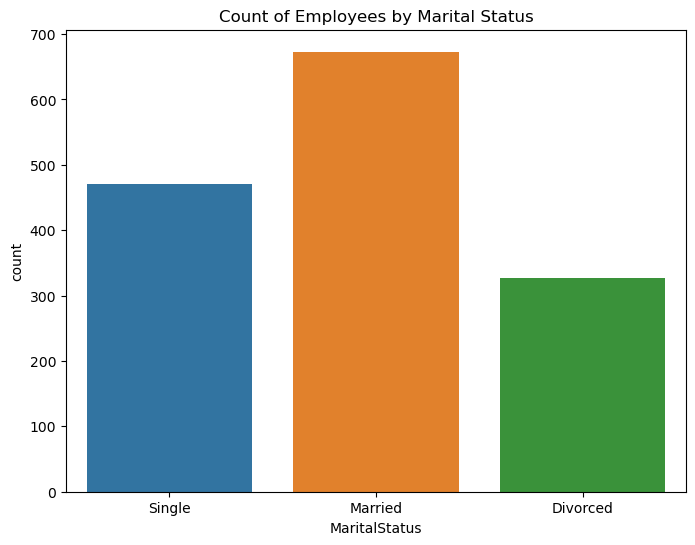

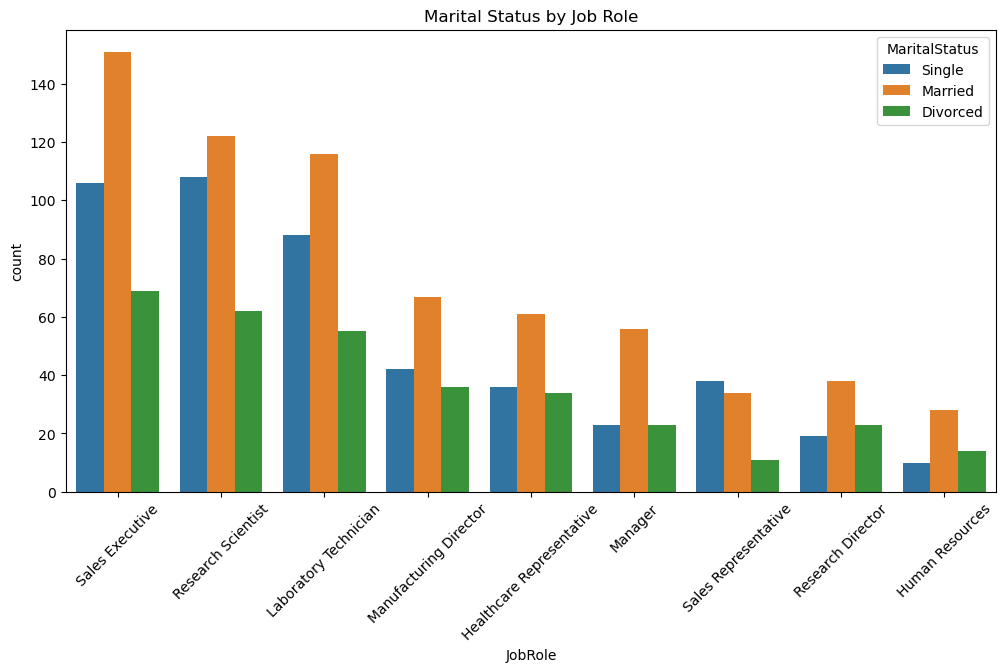

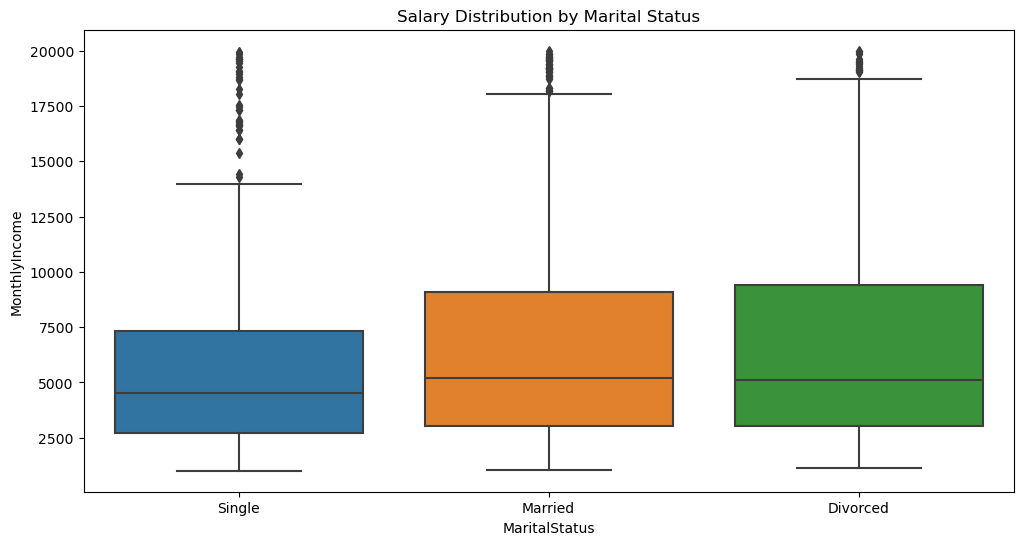

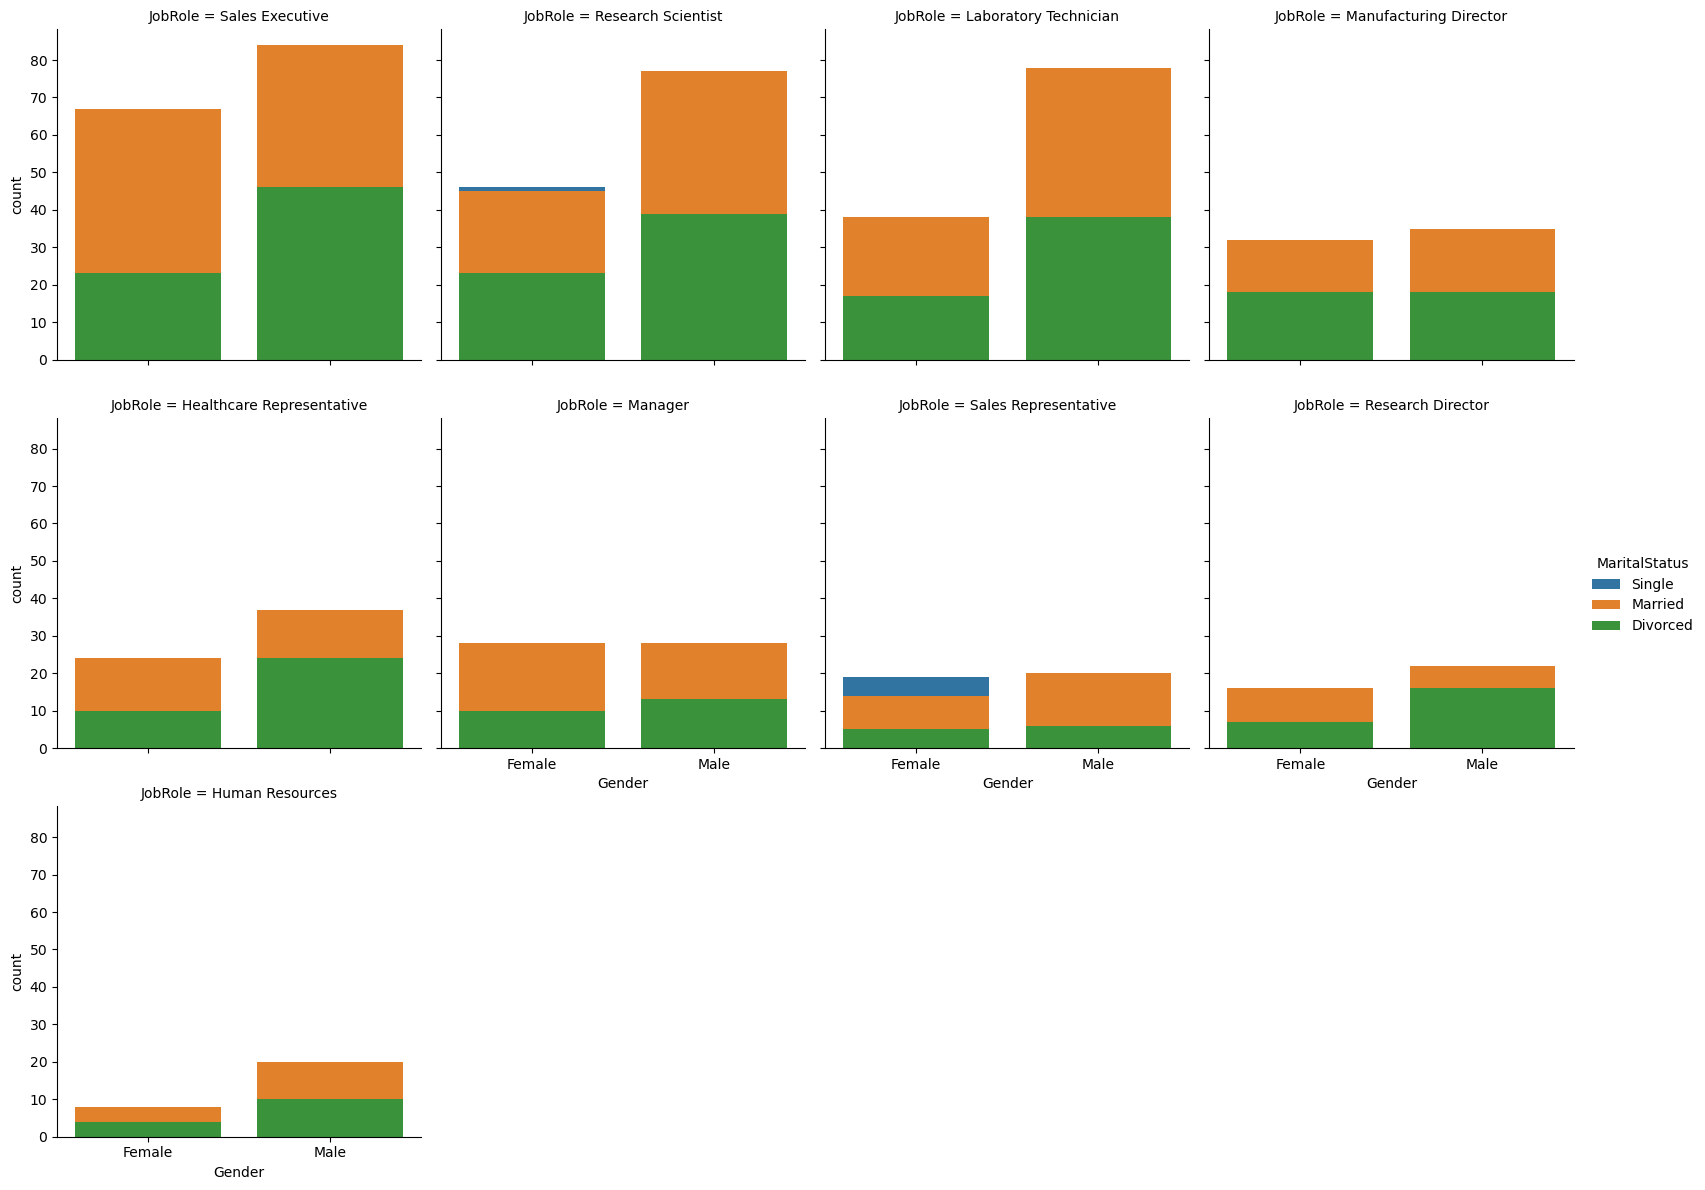

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = 'HR-Employee.csv'
data_cleaned = pd.read_csv(file_path)

# Print the column names to verify the existence and correct spelling of 'MaritalStatus'
print(data_cleaned.columns)

# Define the order for categorical variables
marital_status_order = ['Single', 'Married', 'Divorced']  # Adjust based on your data
job_role_order = data_cleaned['JobRole'].value_counts().index  # Automatically get order based on frequency

# If 'MaritalStatus' exists and is correctly spelled, proceed with the visualizations
if 'MaritalStatus' in data_cleaned.columns:
    # Count plot for Marital Status
    plt.figure(figsize=(8, 6))
    sns.countplot(data=data_cleaned, x='MaritalStatus', order=marital_status_order)
    plt.title('Count of Employees by Marital Status')
    plt.show()

    # Bar plot for Marital Status by Job Role
    plt.figure(figsize=(12, 6))
    sns.countplot(data=data_cleaned, x='JobRole', hue='MaritalStatus', order=job_role_order, hue_order=marital_status_order)
    plt.title('Marital Status by Job Role')
    plt.xticks(rotation=45)
    plt.show()

    # Box plot for Salary by Marital Status
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=data_cleaned, x='MaritalStatus', y='MonthlyIncome', order=marital_status_order)
    plt.title('Salary Distribution by Marital Status')
    plt.show()

    # FacetGrid for Marital Status by Job Role and Gender
    g = sns.FacetGrid(data_cleaned, col='JobRole', hue='MaritalStatus', col_wrap=4, height=4, col_order=job_role_order, hue_order=marital_status_order)
    g.map(sns.countplot, 'Gender', order=data_cleaned['Gender'].unique())
    g.add_legend()
    plt.show()
else:
    print("Column 'MaritalStatus' does not exist in the DataFrame.")


In [67]:
data_cleaned.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [65]:
data_cleaned['JobRole'].value_counts()

JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: count, dtype: int64

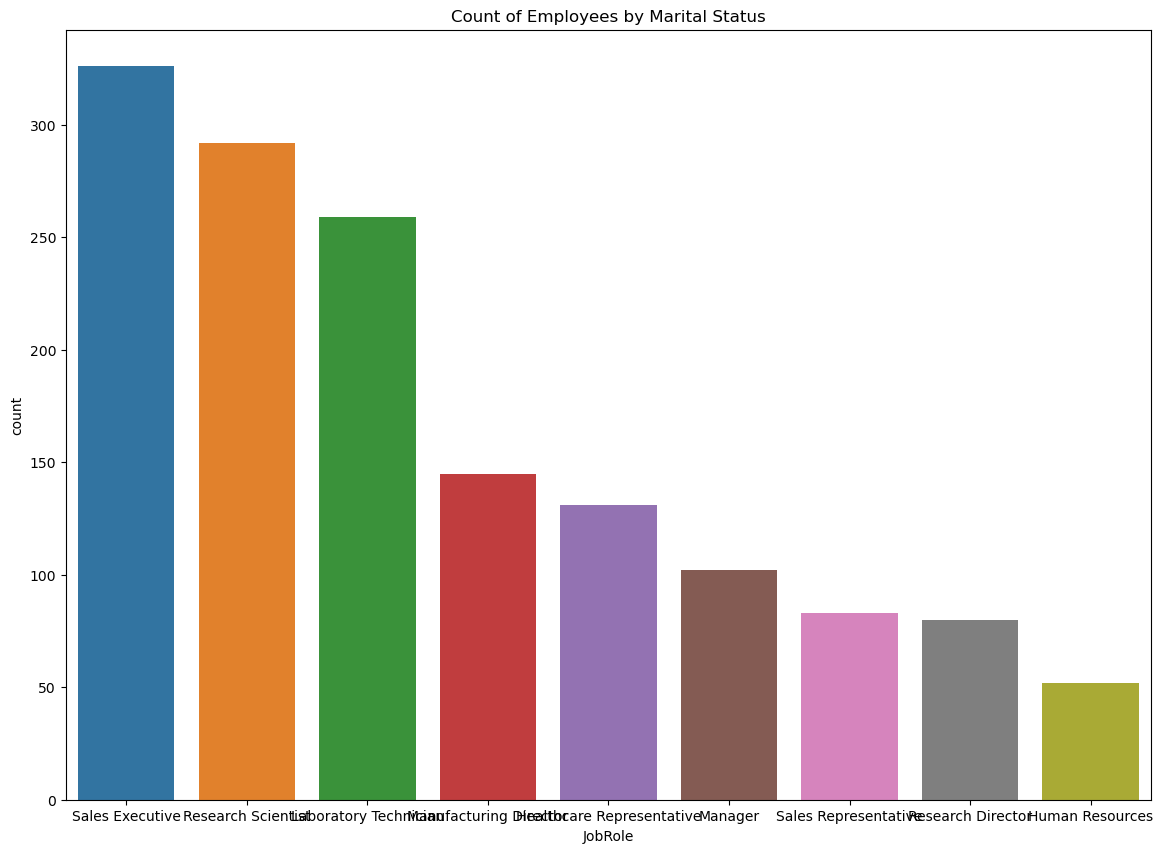

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
file_path = 'HR-Employee.csv'
data_cleaned = pd.read_csv(file_path)

# If 'MaritalStatus' exists and is correctly spelled, proceed with the visualization
if 'JobRole' in data_cleaned.columns:
    plt.figure(figsize=(14, 10))
    sns.countplot(data=data_cleaned, x='JobRole')
    plt.title('Count of Employees by Marital Status')
    plt.show()
else:
    print("Column 'JobRole' does not exist in the DataFrame.")


In [74]:
data_cleaned['EducationField'].head()

0    Life Sciences
1    Life Sciences
2            Other
3    Life Sciences
4          Medical
Name: EducationField, dtype: object

In [14]:
data_cleaned['EducationField'].value_counts()

EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

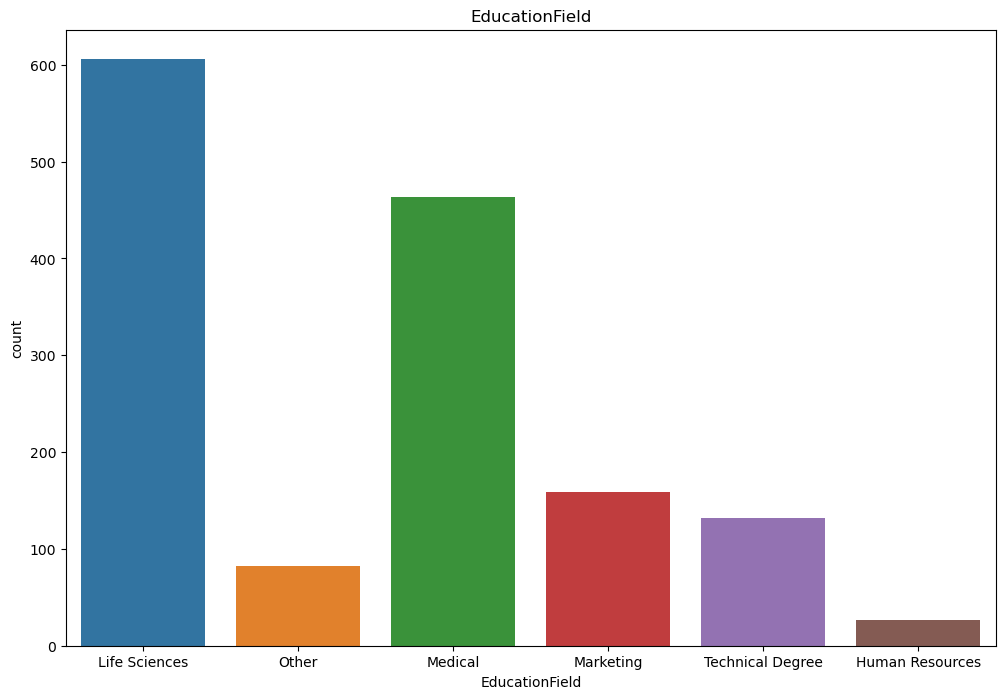

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,8))
sns.countplot(data=data_cleaned, x='EducationField')
plt.title('EducationField')
plt.show()

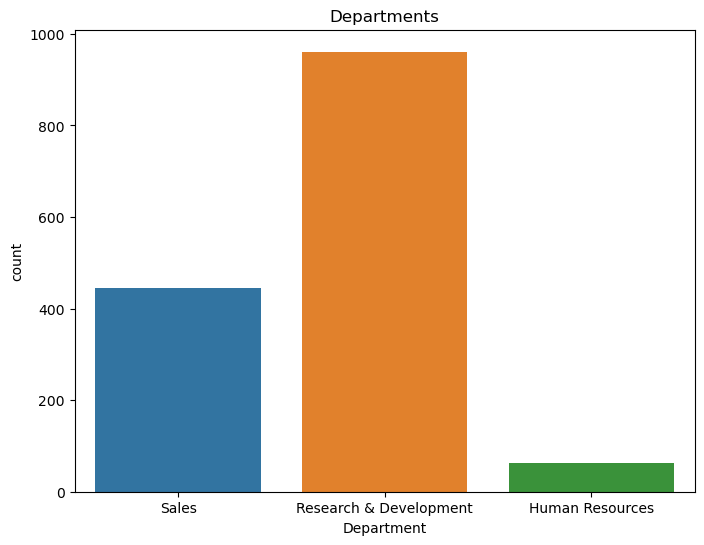

In [22]:
plt.figure(figsize=(8,6))
sns.countplot(data=data_cleaned, x='Department')
plt.title('Departments')
plt.show()

In [37]:
data_cleaned['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

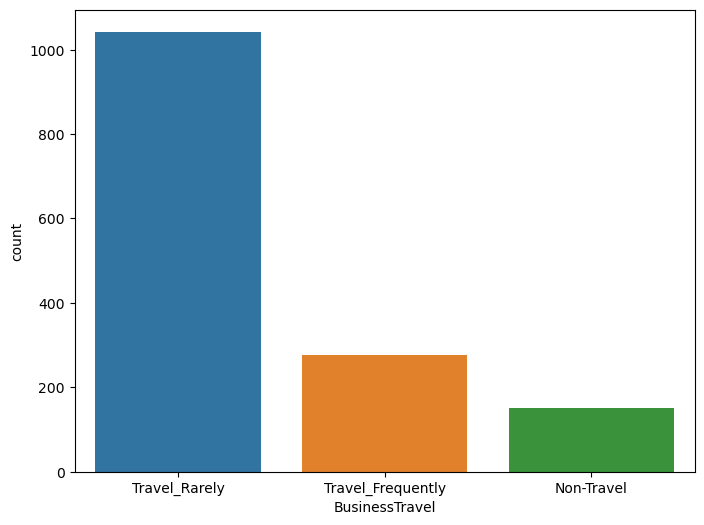

In [38]:
plt.figure(figsize=(8,6))
sns.countplot(data= data_cleaned, x='BusinessTravel')
plt.show()

In [39]:
data_cleaned['OverTime'].head()

0    Yes
1     No
2    Yes
3    Yes
4     No
Name: OverTime, dtype: object

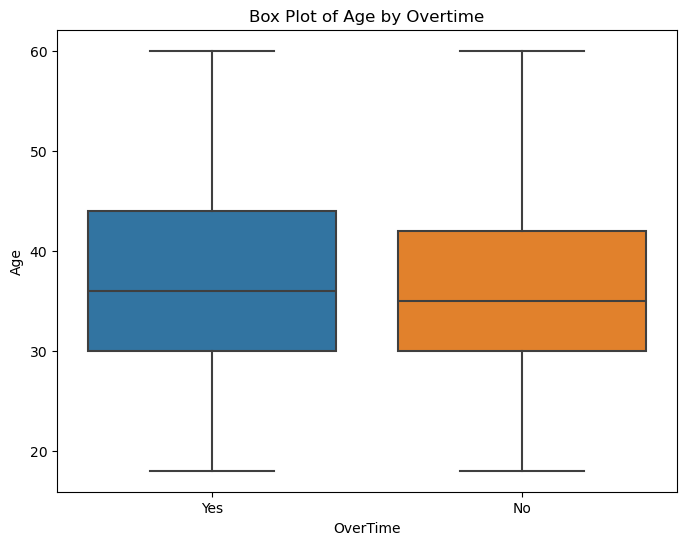

In [80]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverTime', y='Age', data=data_cleaned)
plt.title('Box Plot of Age by Overtime')
plt.show()

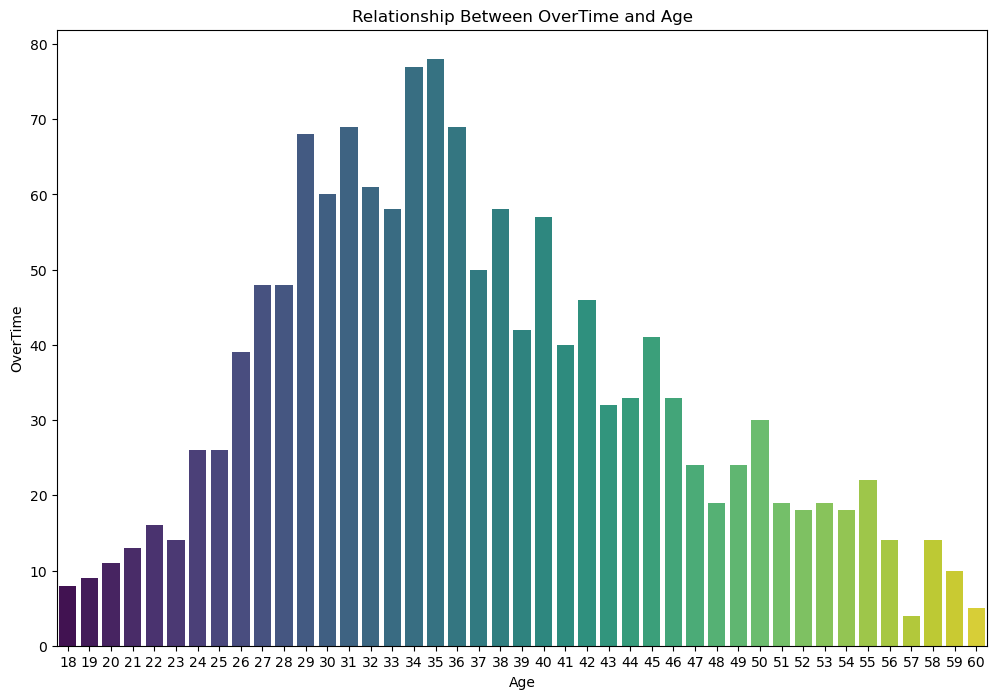

In [55]:
plt.figure(figsize=(12,8))
sns.countplot(data= data_cleaned, x='Age', palette='viridis')
plt.xlabel('Age')
plt.ylabel('OverTime')
plt.title('Relationship Between OverTime and Age')
plt.show()

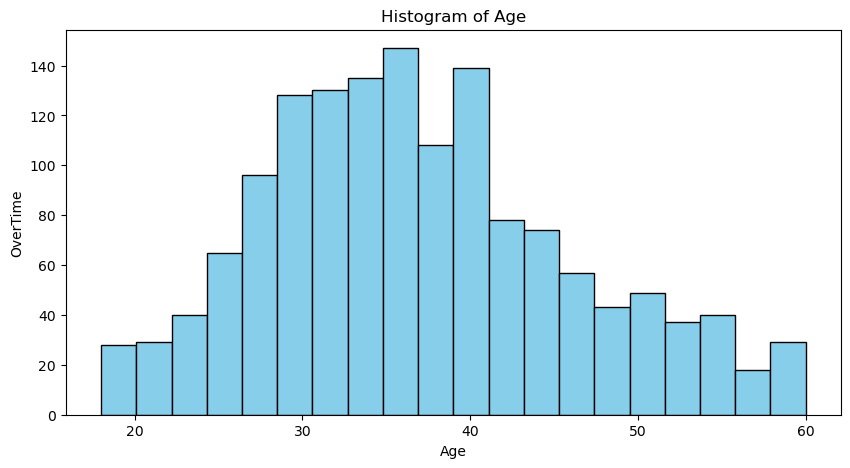

In [57]:
data_cleaned['OverTime'] = pd.to_numeric(data_cleaned['OverTime'], errors='coerce')

# Plot histogram of Age
plt.figure(figsize=(10, 5))
plt.hist(data_cleaned['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('OverTime')
plt.show()

In [59]:
data_cleaned['TotalWorkingYears'].value_counts()

TotalWorkingYears
10    202
6     125
8     103
9      96
5      88
7      81
1      81
4      63
12     48
3      42
15     40
16     37
11     36
13     36
21     34
17     33
2      31
14     31
20     30
18     27
19     22
23     22
22     21
24     18
25     14
28     14
26     14
0      11
29     10
31      9
32      9
30      7
33      7
27      7
36      6
34      5
37      4
35      3
40      2
38      1
Name: count, dtype: int64

In [60]:
data_cleaned['TotalWorkingYears'].head()

0     8
1    10
2     7
3     8
4     6
Name: TotalWorkingYears, dtype: int64

In [66]:
data_cleaned = data_cleaned[['TotalWorkingYears', 'Department']].head()
print(data_cleaned)

   TotalWorkingYears              Department
0                  8                   Sales
1                 10  Research & Development
2                  7  Research & Development
3                  8  Research & Development
4                  6  Research & Development


In [61]:
data_cleaned.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

C:\Users\umu maryama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


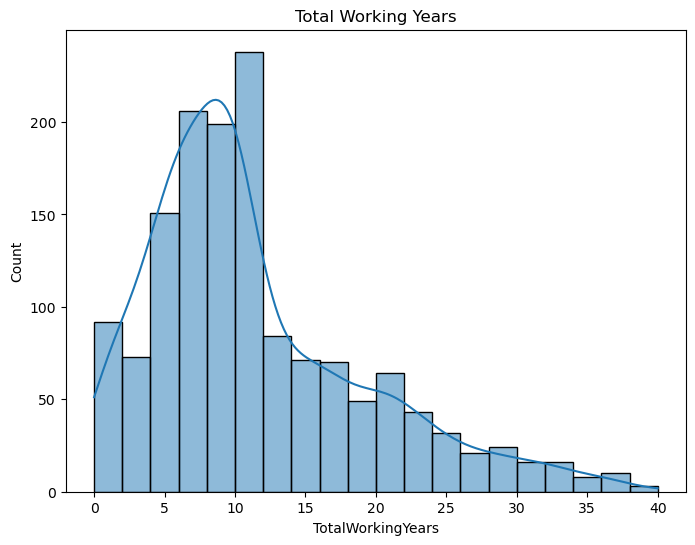

In [82]:
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['TotalWorkingYears'], bins=20, kde=True)
plt.title('Total Working Years')
plt.show()

In [79]:
data_cleaned['DistanceFromHome'].value_counts()

DistanceFromHome
2     211
1     208
10     86
9      85
3      84
7      84
8      80
5      65
4      64
6      59
16     32
11     29
24     28
23     27
29     27
15     26
18     26
26     25
25     25
20     25
28     23
19     22
14     21
12     20
17     20
22     19
13     19
21     18
27     12
Name: count, dtype: int64

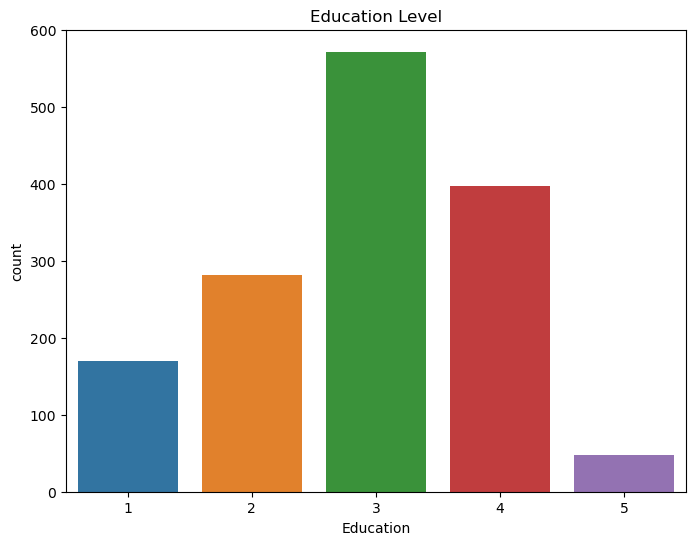

In [84]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=data_cleaned)
plt.title('Education Level')
plt.show()

C:\Users\umu maryama\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


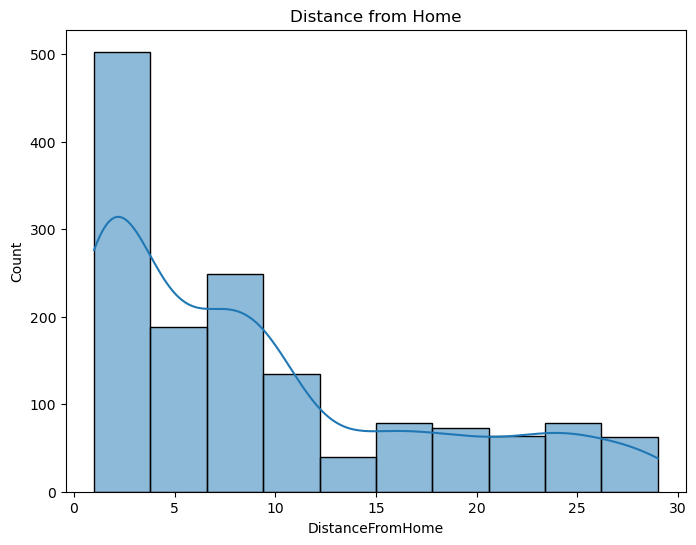

In [86]:
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['DistanceFromHome'], bins=10, kde=True)
plt.title('Distance from Home')
plt.show()